# Harry Arce  -  Project 4
Advanced Deep Learning and Computer Vision

### Facial Recognition with Deep Learning in Keras Using CNN
Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0Problem Statement:
Facial recognition is a biometric alternative that measures unique characteristics of a human
face. Applications available today include flight check in, tagging friends and family members in
photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a
face recognition programme with deep convolutional neural networks.
Objective: Use a deep convolutional neural network to perform facial recognition using Keras.
Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images
per person. The images were taken at different times, lighting and facial expressions. The faces
are in an upright position in frontal view, with a slight left-right rotation.
Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0




In [1]:
#1. Input the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# 2. Load the dataset after loading the dataset
imgarr = np.load('./ORL_faces.npz')


In [3]:
for key in imgarr.keys():
    print(key)

testY
testX
trainX
trainY


In [4]:
x_train = imgarr['trainX']
Y_train = imgarr['trainY']
x_test = imgarr['testX']
Y_test = imgarr['testY']

In [5]:
print(x_train.shape)
print(Y_train.shape)
print(x_test.shape)
print(Y_test.shape)

(240, 10304)
(240,)
(160, 10304)
(160,)


In [6]:
x_train
x_test

array([[ 41.,  47.,  47., ...,  35.,  37.,  38.],
       [ 44.,  43.,  32., ...,  43.,  43.,  37.],
       [ 42.,  41.,  44., ...,  42.,  43.,  41.],
       ...,
       [101., 100., 103., ...,  31.,  40.,  42.],
       [105., 108., 106., ...,  44.,  40.,  47.],
       [113., 114., 111., ...,  62.,  81.,  89.]])

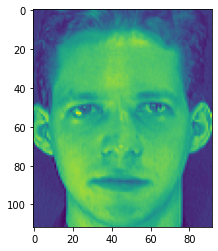

In [7]:
c=x_train[0].reshape(112,92)
plt.imshow(c)

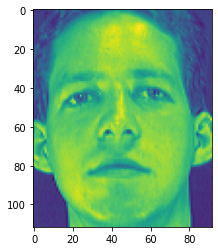

In [8]:
c=x_test[0].reshape(112,92)
plt.imshow(c)

In [9]:
#you have to normalize every image.
x_train = x_train/255
x_test = x_test/255
print(x_train)
print(x_test)

[[0.18823529 0.19215686 0.17647059 ... 0.18431373 0.18039216 0.18039216]
 [0.23529412 0.23529412 0.24313725 ... 0.1254902  0.13333333 0.13333333]
 [0.15294118 0.17254902 0.20784314 ... 0.11372549 0.10196078 0.11372549]
 ...
 [0.44705882 0.45882353 0.44705882 ... 0.38431373 0.37647059 0.38431373]
 [0.41176471 0.41176471 0.41960784 ... 0.21176471 0.18431373 0.16078431]
 [0.45490196 0.44705882 0.45882353 ... 0.37254902 0.39215686 0.39607843]]
[[0.16078431 0.18431373 0.18431373 ... 0.1372549  0.14509804 0.14901961]
 [0.17254902 0.16862745 0.1254902  ... 0.16862745 0.16862745 0.14509804]
 [0.16470588 0.16078431 0.17254902 ... 0.16470588 0.16862745 0.16078431]
 ...
 [0.39607843 0.39215686 0.40392157 ... 0.12156863 0.15686275 0.16470588]
 [0.41176471 0.42352941 0.41568627 ... 0.17254902 0.15686275 0.18431373]
 [0.44313725 0.44705882 0.43529412 ... 0.24313725 0.31764706 0.34901961]]


In [10]:
#3. Split the dataset
x_train, x_valid, Y_train, Y_valid= train_test_split(x_train, Y_train, test_size=.05, random_state=32)

In [11]:
shape = (112,92,1)

In [12]:
#4. Transform the images to equal sizes to feed in CNN
x_train = x_train.reshape(x_train.shape[0],*shape)
x_test = x_test.reshape(x_test.shape[0],*shape)
x_valid = x_valid.reshape(x_valid.shape[0],*shape)

In [13]:
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
print(Y_valid.shape)

(228, 112, 92, 1)
(12, 112, 92, 1)
(160, 112, 92, 1)
(12,)


5. Build a CNN model that has 3 main layers:

i. Convolutional Layer
ii. Pooling Layer
iii. Fully Connected Layer

In [14]:
import keras
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, Convolution2D, BatchNormalization

In [15]:

model= Sequential()
model.add(Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())

model.add(Dense(2024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(40, activation='softmax'))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 106, 86, 36)       1800      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 53, 43, 36)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 49, 39, 54)        48654     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 19, 54)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 24624)             0         
                                                                 
 dense (Dense)               (None, 2024)              4

In [17]:
from keras.optimizers import Adam

model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    
    optimizer='adam', metrics=['accuracy']
)

In [18]:
# 6. Train the model
history=model.fit(
    np.array(x_train), np.array(Y_train), 
    batch_size=128, epochs=50, verbose=2,
    validation_data=(np.array(x_valid),np.array(Y_valid)),
)

Epoch 1/50
2/2 - 65s - loss: 3.7100 - accuracy: 0.0219 - val_loss: 3.4360 - val_accuracy: 0.0000e+00 - 65s/epoch - 32s/step
Epoch 2/50
2/2 - 9s - loss: 3.3956 - accuracy: 0.0658 - val_loss: 3.3140 - val_accuracy: 0.0833 - 9s/epoch - 4s/step
Epoch 3/50
2/2 - 8s - loss: 3.3181 - accuracy: 0.0570 - val_loss: 3.1315 - val_accuracy: 0.0000e+00 - 8s/epoch - 4s/step
Epoch 4/50
2/2 - 7s - loss: 3.2290 - accuracy: 0.0570 - val_loss: 3.1523 - val_accuracy: 0.1667 - 7s/epoch - 4s/step
Epoch 5/50
2/2 - 7s - loss: 3.1540 - accuracy: 0.0526 - val_loss: 3.0049 - val_accuracy: 0.1667 - 7s/epoch - 4s/step
Epoch 6/50
2/2 - 7s - loss: 3.0683 - accuracy: 0.0789 - val_loss: 3.0107 - val_accuracy: 0.0833 - 7s/epoch - 4s/step
Epoch 7/50
2/2 - 6s - loss: 3.0070 - accuracy: 0.0789 - val_loss: 2.8104 - val_accuracy: 0.2500 - 6s/epoch - 3s/step
Epoch 8/50
2/2 - 6s - loss: 2.8223 - accuracy: 0.1754 - val_loss: 2.6252 - val_accuracy: 0.0833 - 6s/epoch - 3s/step
Epoch 9/50
2/2 - 7s - loss: 2.5306 - accuracy: 0.2588

In [ ]:
#7. Plot the result
score = model.evaluate( np.array(x_test),  np.array(Y_test), verbose=0)
print('Accuracy: ' + str(score[1]))

Accuracy: 0.949999988079071


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


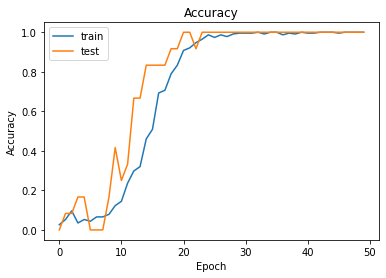

In [ ]:
# list all data in history
print(history.history.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


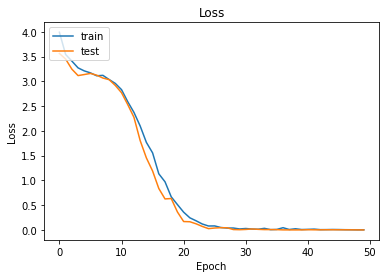

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()